In [ ]:
pip install nltk Sastrawi pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
nltk.download('punkt_tab')
nltk.download('stopwords')
from tabulate import tabulate

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Skripsi/makansiang_gratis_new.csv')
data

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1848970473864052798,Wed Oct 23 06:11:27 +0000 2024,0,Makan siang gratis tapi yang gratis cuma beef ...,1848970473864052798,https://pbs.twimg.com/media/Gajc2KmbEAEyK-3.jpg,NaN,in,Indonesia,0,0,0,https://x.com/mbakhayu/status/1848970473864052798,1687388177798221825,mbakhayu
1,1848970469388718152,Wed Oct 23 06:11:26 +0000 2024,0,dut makan siang gratis mana dut laper,1848970469388718152,NaN,NaN,in,NaN,0,0,0,https://x.com/rcmmmy/status/1848970469388718152,1156917616700616704,rcmmmy
2,1848655568397078566,Wed Oct 23 06:08:30 +0000 2024,0,@KemensetnegRI yang saya pahami di universitas...,1848969729551307179,NaN,KemensetnegRI,in,NaN,0,0,0,https://x.com/landjarlandjar/status/1848969729...,1244853536,landjarlandjar
3,1848954000550301957,Wed Oct 23 06:07:57 +0000 2024,0,@detikcom dari 3.005 T sebanyak 1000T akan dik...,1848969590581432509,NaN,detikcom,in,NaN,0,0,0,https://x.com/bpsmgt/status/1848969590581432509,1121436493203922945,bpsmgt
4,1848967522508542259,Wed Oct 23 06:03:28 +0000 2024,0,@unmagnetism Makan siang gratis dulu un https:...,1848968462460457124,https://pbs.twimg.com/media/GajbBJdaoAAMHKY.jpg,unmagnetism,in,NaN,0,0,0,https://x.com/Oxygenn88/status/184896846246045...,1785670214459555840,Oxygenn88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,1845366342230344137,Sun Oct 13 07:29:55 +0000 2024,0,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,1845366342230344137,https://pbs.twimg.com/media/GZwO6IKaAAI0Kmk.jpg,NaN,in,"East Borneo, Indonesia",0,0,0,https://x.com/luasikbanget/status/184536634223...,1618041706749857793,luasikbanget
2364,1845366263901798605,Sun Oct 13 07:29:37 +0000 2024,0,Makanan bergizi itu penting #IndonesiaEmas #Pr...,1845366263901798605,https://pbs.twimg.com/media/GZwO1iNaAAEHcv6.jpg,NaN,in,"East Borneo, Indonesia",0,0,0,https://x.com/luasikbanget/status/184536626390...,1618041706749857793,luasikbanget
2365,1845272003038806516,Sun Oct 13 07:26:41 +0000 2024,0,@roseuro Program makan siang bergizi gratis ko...,1845365526241083590,NaN,roseuro,in,NaN,0,0,0,https://x.com/qalsya_mr4/status/18453655262410...,1684444305224794113,qalsya_mr4
2366,1845363345823760870,Sun Oct 13 07:23:40 +0000 2024,0,@Arie_Kriting Pasti ini nyindir program makan ...,1845364768561037602,NaN,Arie_Kriting,in,NaN,0,0,0,https://x.com/AwanM3ndung/status/1845364768561...,1410643795201253378,AwanM3ndung


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      2368 non-null   int64 
 1   created_at               2368 non-null   object
 2   favorite_count           2368 non-null   int64 
 3   full_text                2368 non-null   object
 4   id_str                   2368 non-null   int64 
 5   image_url                805 non-null    object
 6   in_reply_to_screen_name  756 non-null    object
 7   lang                     2368 non-null   object
 8   location                 1220 non-null   object
 9   quote_count              2368 non-null   int64 
 10  reply_count              2368 non-null   int64 
 11  retweet_count            2368 non-null   int64 
 12  tweet_url                2368 non-null   object
 13  user_id_str              2368 non-null   int64 
 14  username                 2368 non-null  

In [ ]:
summary = data.describe()
(summary)

,conversation_id_str,favorite_count,id_str,quote_count,reply_count,retweet_count,user_id_str
count,2.368000e+03,2368.000000,2.368000e+03,2368.000000,2368.000000,2368.000000,2.368000e+03
mean,1.847416e+18,35.528294,1.847468e+18,0.412162,0.663007,12.670186,1.149622e+18
std,1.011538e+15,1199.754758,9.669429e+14,14.123239,9.907879,505.706159,6.930689e+17
min,1.833017e+18,0.000000,1.845364e+18,0.000000,0.000000,0.000000,1.407299e+07
25%,1.846792e+18,0.000000,1.846819e+18,0.000000,0.000000,0.000000,7.564912e+17
50%,1.847633e+18,0.000000,1.847697e+18,0.000000,0.000000,0.000000,1.486233e+18
75%,1.848235e+18,0.000000,1.848248e+18,0.000000,0.000000,0.000000,1.696767e+18
max,1.848970e+18,55155.000000,1.848970e+18,665.000000,352.000000,24325.000000,1.842982e+18


**DATA PREPROCESSING**

In [ ]:
data = pd.DataFrame(data[['full_text']])
(data)

,full_text
0,Makan siang gratis tapi yang gratis cuma beef ...
1,dut makan siang gratis mana dut laper
2,@KemensetnegRI yang saya pahami di universitas...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...
4,@unmagnetism Makan siang gratis dulu un https:...
...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...
2365,@roseuro Program makan siang bergizi gratis ko...
2366,@Arie_Kriting Pasti ini nyindir program makan ...


In [ ]:
#Data Duplicate
duplicates = data.duplicated(subset='full_text')
(duplicates.sum())


np.int64(27)

In [ ]:
duplicate_rows = data[data.duplicated(subset='full_text', keep=False)]
(duplicate_rows)

,full_text
243,makan siang gratis
311,menunggu makan siang gratis
337,Makan siang gratis
476,info makan siang gratis
592,Info makan siang gratis?
633,info makan siang gratis
654,menunggu makan siang gratis
670,info makan siang gratis
742,info makan siang gratis
777,Info makan siang gratis


In [ ]:
data.drop_duplicates(subset='full_text', inplace=True)
(data.count())
data

,full_text
0,Makan siang gratis tapi yang gratis cuma beef ...
1,dut makan siang gratis mana dut laper
2,@KemensetnegRI yang saya pahami di universitas...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...
4,@unmagnetism Makan siang gratis dulu un https:...
...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...
2365,@roseuro Program makan siang bergizi gratis ko...
2366,@Arie_Kriting Pasti ini nyindir program makan ...


**TEXT PREPROCESSING**

In [ ]:
data = pd.DataFrame(data[['full_text']])
(data)

,full_text
0,Makan siang gratis tapi yang gratis cuma beef ...
1,dut makan siang gratis mana dut laper
2,@KemensetnegRI yang saya pahami di universitas...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...
4,@unmagnetism Makan siang gratis dulu un https:...
...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...
2365,@roseuro Program makan siang bergizi gratis ko...
2366,@Arie_Kriting Pasti ini nyindir program makan ...


**Tahap Cleansing**

In [ ]:
def remove_URL(word):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', word)

def remove_html(word):
    html = re.compile(r'<.*?>')
    return html.sub(r'', word)

def remove_emoji(word):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticon wajah
        u"\U0001F300-\U0001F5FF"  # Simbol dan objek
        u"\U0001F680-\U0001F6FF"  # Transportasi dan peta
        u"\U0001F1E0-\U0001F1FF"  # Bendera
                          "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', word)

def remove_angka(word):
    word = re.sub(r'[0-9]+', '', word)  # Menghapus angka
    word = re.sub(r'\$\w*', '', word)  # Menghapus simbol dollar
    word = re.sub(r'^RT[\s]+', '', word)  # Menghapus retweet
    word = re.sub(r'#', '', word)  # Menghapus hashtag
    return word

def remove_punct(word):
    translator = str.maketrans('', '', string.punctuation)
    return word.translate(translator)

# Proses cleansing
data['cleansing'] = data['full_text'].apply(lambda x: remove_URL(x))
data['cleansing'] = data['cleansing'].apply(lambda x: remove_html(x))
data['cleansing'] = data['cleansing'].apply(lambda x: remove_emoji(x))
data['cleansing'] = data['cleansing'].apply(lambda x: remove_punct(x))
data['cleansing'] = data['cleansing'].apply(lambda x: remove_angka(x))

# Tampilkan hasil
data

,full_text,cleansing
0,Makan siang gratis tapi yang gratis cuma beef ...,Makan siang gratis tapi yang gratis cuma beef ...
1,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper
2,@KemensetnegRI yang saya pahami di universitas...,KemensetnegRI yang saya pahami di universitas ...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...,detikcom dari T sebanyak T akan dikapai untuk...
4,@unmagnetism Makan siang gratis dulu un https:...,unmagnetism Makan siang gratis dulu un
...,...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,Gizi seimbang untuk anak bangsa IndonesiaEmas ...
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...,Makanan bergizi itu penting IndonesiaEmas Prog...
2365,@roseuro Program makan siang bergizi gratis ko...,roseuro Program makan siang bergizi gratis kom...
2366,@Arie_Kriting Pasti ini nyindir program makan ...,ArieKriting Pasti ini nyindir program makan si...


**Tahap Case Folding**

In [ ]:
def case_folding(text):
    return text.lower()
data['case_folding'] = data['cleansing'].apply(case_folding)
data

,full_text,cleansing,case_folding
0,Makan siang gratis tapi yang gratis cuma beef ...,Makan siang gratis tapi yang gratis cuma beef ...,makan siang gratis tapi yang gratis cuma beef ...
1,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper
2,@KemensetnegRI yang saya pahami di universitas...,KemensetnegRI yang saya pahami di universitas ...,kemensetnegri yang saya pahami di universitas ...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...,detikcom dari T sebanyak T akan dikapai untuk...,detikcom dari t sebanyak t akan dikapai untuk...
4,@unmagnetism Makan siang gratis dulu un https:...,unmagnetism Makan siang gratis dulu un,unmagnetism makan siang gratis dulu un
...,...,...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,Gizi seimbang untuk anak bangsa IndonesiaEmas ...,gizi seimbang untuk anak bangsa indonesiaemas ...
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...,Makanan bergizi itu penting IndonesiaEmas Prog...,makanan bergizi itu penting indonesiaemas prog...
2365,@roseuro Program makan siang bergizi gratis ko...,roseuro Program makan siang bergizi gratis kom...,roseuro program makan siang bergizi gratis kom...
2366,@Arie_Kriting Pasti ini nyindir program makan ...,ArieKriting Pasti ini nyindir program makan si...,ariekriting pasti ini nyindir program makan si...


**Tahap Tokenization**

In [ ]:
def tokenization(text):
    return word_tokenize(text)
data['tokenization'] = data['case_folding'].apply(tokenization)
data

,full_text,cleansing,case_folding,tokenization
0,Makan siang gratis tapi yang gratis cuma beef ...,Makan siang gratis tapi yang gratis cuma beef ...,makan siang gratis tapi yang gratis cuma beef ...,"[makan, siang, gratis, tapi, yang, gratis, cum..."
1,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,"[dut, makan, siang, gratis, mana, dut, laper]"
2,@KemensetnegRI yang saya pahami di universitas...,KemensetnegRI yang saya pahami di universitas ...,kemensetnegri yang saya pahami di universitas ...,"[kemensetnegri, yang, saya, pahami, di, univer..."
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...,detikcom dari T sebanyak T akan dikapai untuk...,detikcom dari t sebanyak t akan dikapai untuk...,"[detikcom, dari, t, sebanyak, t, akan, dikapai..."
4,@unmagnetism Makan siang gratis dulu un https:...,unmagnetism Makan siang gratis dulu un,unmagnetism makan siang gratis dulu un,"[unmagnetism, makan, siang, gratis, dulu, un]"
...,...,...,...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,Gizi seimbang untuk anak bangsa IndonesiaEmas ...,gizi seimbang untuk anak bangsa indonesiaemas ...,"[gizi, seimbang, untuk, anak, bangsa, indonesi..."
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...,Makanan bergizi itu penting IndonesiaEmas Prog...,makanan bergizi itu penting indonesiaemas prog...,"[makanan, bergizi, itu, penting, indonesiaemas..."
2365,@roseuro Program makan siang bergizi gratis ko...,roseuro Program makan siang bergizi gratis kom...,roseuro program makan siang bergizi gratis kom...,"[roseuro, program, makan, siang, bergizi, grat..."
2366,@Arie_Kriting Pasti ini nyindir program makan ...,ArieKriting Pasti ini nyindir program makan si...,ariekriting pasti ini nyindir program makan si...,"[ariekriting, pasti, ini, nyindir, program, ma..."


Tahap Stopword Removal

In [ ]:
stop_words = set(stopwords.words('indonesian'))
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]
data['stopword_removal'] = data['tokenization'].apply(remove_stopwords)
data

,full_text,cleansing,case_folding,tokenization,stopword_removal
0,Makan siang gratis tapi yang gratis cuma beef ...,Makan siang gratis tapi yang gratis cuma beef ...,makan siang gratis tapi yang gratis cuma beef ...,"[makan, siang, gratis, tapi, yang, gratis, cum...","[makan, siang, gratis, gratis, beef, teriyakin..."
1,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,"[dut, makan, siang, gratis, mana, dut, laper]","[dut, makan, siang, gratis, dut, laper]"
2,@KemensetnegRI yang saya pahami di universitas...,KemensetnegRI yang saya pahami di universitas ...,kemensetnegri yang saya pahami di universitas ...,"[kemensetnegri, yang, saya, pahami, di, univer...","[kemensetnegri, pahami, universitas, kehidupan..."
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...,detikcom dari T sebanyak T akan dikapai untuk...,detikcom dari t sebanyak t akan dikapai untuk...,"[detikcom, dari, t, sebanyak, t, akan, dikapai...","[detikcom, t, t, dikapai, operasional, kementr..."
4,@unmagnetism Makan siang gratis dulu un https:...,unmagnetism Makan siang gratis dulu un,unmagnetism makan siang gratis dulu un,"[unmagnetism, makan, siang, gratis, dulu, un]","[unmagnetism, makan, siang, gratis, un]"
...,...,...,...,...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,Gizi seimbang untuk anak bangsa IndonesiaEmas ...,gizi seimbang untuk anak bangsa indonesiaemas ...,"[gizi, seimbang, untuk, anak, bangsa, indonesi...","[gizi, seimbang, anak, bangsa, indonesiaemas, ..."
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...,Makanan bergizi itu penting IndonesiaEmas Prog...,makanan bergizi itu penting indonesiaemas prog...,"[makanan, bergizi, itu, penting, indonesiaemas...","[makanan, bergizi, indonesiaemas, programpresi..."
2365,@roseuro Program makan siang bergizi gratis ko...,roseuro Program makan siang bergizi gratis kom...,roseuro program makan siang bergizi gratis kom...,"[roseuro, program, makan, siang, bergizi, grat...","[roseuro, program, makan, siang, bergizi, grat..."
2366,@Arie_Kriting Pasti ini nyindir program makan ...,ArieKriting Pasti ini nyindir program makan si...,ariekriting pasti ini nyindir program makan si...,"[ariekriting, pasti, ini, nyindir, program, ma...","[ariekriting, nyindir, program, makan, siang, ..."


Tahap Normalisasi

In [ ]:
import pandas as pd
import json  # Tambahkan ini untuk menghindari NameError

# Baca kamus slang yang diunggah (asumsi JSON content)
slang_words_path = "/content/drive/MyDrive/Skripsi/combined_slang_words.txt"

# Load kamus slang dari file
with open(slang_words_path, "r") as file:
    kamus_slang = json.load(file)

# Fungsi untuk normalisasi menggunakan kamus slang
def normalisasi_stemming(teks):
    # Gabungkan list kata menjadi string jika teks berupa list
    if isinstance(teks, list):
        teks = ' '.join(teks)  # Gabungkan kata-kata dalam list menjadi string
    words = teks.split()  # Tokenisasi kata
    normalized_words = [kamus_slang.get(word, word) for word in words]  # Ganti dengan kata baku
    return ' '.join(normalized_words)  # Gabungkan kembali kata

# Terapkan normalisasi pada kolom 'stopword_removal'
data['normalisasi'] = data['stopword_removal'].apply(normalisasi_stemming)

# Tampilkan hasil
(data)


,full_text,cleansing,case_folding,tokenization,stopword_removal,normalisasi
0,Makan siang gratis tapi yang gratis cuma beef ...,Makan siang gratis tapi yang gratis cuma beef ...,makan siang gratis tapi yang gratis cuma beef ...,"[makan, siang, gratis, tapi, yang, gratis, cum...","[makan, siang, gratis, gratis, beef, teriyakin...",makan siang gratis gratis beef teriyakinya pak...
1,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,"[dut, makan, siang, gratis, mana, dut, laper]","[dut, makan, siang, gratis, dut, laper]",dut makan siang gratis dut laper
2,@KemensetnegRI yang saya pahami di universitas...,KemensetnegRI yang saya pahami di universitas ...,kemensetnegri yang saya pahami di universitas ...,"[kemensetnegri, yang, saya, pahami, di, univer...","[kemensetnegri, pahami, universitas, kehidupan...",kemensetnegri pahami universitas kehidupan mak...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...,detikcom dari T sebanyak T akan dikapai untuk...,detikcom dari t sebanyak t akan dikapai untuk...,"[detikcom, dari, t, sebanyak, t, akan, dikapai...","[detikcom, t, t, dikapai, operasional, kementr...",detikcom t t dikapai operasional kementrian le...
4,@unmagnetism Makan siang gratis dulu un https:...,unmagnetism Makan siang gratis dulu un,unmagnetism makan siang gratis dulu un,"[unmagnetism, makan, siang, gratis, dulu, un]","[unmagnetism, makan, siang, gratis, un]",unmagnetism makan siang gratis un
...,...,...,...,...,...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,Gizi seimbang untuk anak bangsa IndonesiaEmas ...,gizi seimbang untuk anak bangsa indonesiaemas ...,"[gizi, seimbang, untuk, anak, bangsa, indonesi...","[gizi, seimbang, anak, bangsa, indonesiaemas, ...",gizi seimbang anak bangsa indonesiaemas progra...
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...,Makanan bergizi itu penting IndonesiaEmas Prog...,makanan bergizi itu penting indonesiaemas prog...,"[makanan, bergizi, itu, penting, indonesiaemas...","[makanan, bergizi, indonesiaemas, programpresi...",makanan bergizi indonesiaemas programpresiden ...
2365,@roseuro Program makan siang bergizi gratis ko...,roseuro Program makan siang bergizi gratis kom...,roseuro program makan siang bergizi gratis kom...,"[roseuro, program, makan, siang, bergizi, grat...","[roseuro, program, makan, siang, bergizi, grat...",roseuro program makan siang bergizi gratis kom...
2366,@Arie_Kriting Pasti ini nyindir program makan ...,ArieKriting Pasti ini nyindir program makan si...,ariekriting pasti ini nyindir program makan si...,"[ariekriting, pasti, ini, nyindir, program, ma...","[ariekriting, nyindir, program, makan, siang, ...",ariekriting nyindir program makan siang gratis...


Tahap Stemming

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):
    return stemmer.stem(text)
data['stemming'] = data['normalisasi'].apply(stemming)
data

,full_text,cleansing,case_folding,tokenization,stopword_removal,normalisasi,stemming
0,Makan siang gratis tapi yang gratis cuma beef ...,Makan siang gratis tapi yang gratis cuma beef ...,makan siang gratis tapi yang gratis cuma beef ...,"[makan, siang, gratis, tapi, yang, gratis, cum...","[makan, siang, gratis, gratis, beef, teriyakin...",makan siang gratis gratis beef teriyakinya pak...,makan siang gratis gratis beef teriyakinya pak...
1,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,"[dut, makan, siang, gratis, mana, dut, laper]","[dut, makan, siang, gratis, dut, laper]",dut makan siang gratis dut laper,dut makan siang gratis dut laper
2,@KemensetnegRI yang saya pahami di universitas...,KemensetnegRI yang saya pahami di universitas ...,kemensetnegri yang saya pahami di universitas ...,"[kemensetnegri, yang, saya, pahami, di, univer...","[kemensetnegri, pahami, universitas, kehidupan...",kemensetnegri pahami universitas kehidupan mak...,kemensetnegri paham universitas hidup makan si...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...,detikcom dari T sebanyak T akan dikapai untuk...,detikcom dari t sebanyak t akan dikapai untuk...,"[detikcom, dari, t, sebanyak, t, akan, dikapai...","[detikcom, t, t, dikapai, operasional, kementr...",detikcom t t dikapai operasional kementrian le...,detikcom t t kapai operasional tri lembaga neg...
4,@unmagnetism Makan siang gratis dulu un https:...,unmagnetism Makan siang gratis dulu un,unmagnetism makan siang gratis dulu un,"[unmagnetism, makan, siang, gratis, dulu, un]","[unmagnetism, makan, siang, gratis, un]",unmagnetism makan siang gratis un,unmagnetism makan siang gratis un
...,...,...,...,...,...,...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,Gizi seimbang untuk anak bangsa IndonesiaEmas ...,gizi seimbang untuk anak bangsa indonesiaemas ...,"[gizi, seimbang, untuk, anak, bangsa, indonesi...","[gizi, seimbang, anak, bangsa, indonesiaemas, ...",gizi seimbang anak bangsa indonesiaemas progra...,gizi imbang anak bangsa indonesiaemas programp...
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...,Makanan bergizi itu penting IndonesiaEmas Prog...,makanan bergizi itu penting indonesiaemas prog...,"[makanan, bergizi, itu, penting, indonesiaemas...","[makanan, bergizi, indonesiaemas, programpresi...",makanan bergizi indonesiaemas programpresiden ...,makan gizi indonesiaemas programpresiden presi...
2365,@roseuro Program makan siang bergizi gratis ko...,roseuro Program makan siang bergizi gratis kom...,roseuro program makan siang bergizi gratis kom...,"[roseuro, program, makan, siang, bergizi, grat...","[roseuro, program, makan, siang, bergizi, grat...",roseuro program makan siang bergizi gratis kom...,roseuro program makan siang gizi gratis komitm...
2366,@Arie_Kriting Pasti ini nyindir program makan ...,ArieKriting Pasti ini nyindir program makan si...,ariekriting pasti ini nyindir program makan si...,"[ariekriting, pasti, ini, nyindir, program, ma...","[ariekriting, nyindir, program, makan, siang, ...",ariekriting nyindir program makan siang gratis...,ariekriting nyindir program makan siang gratis...


In [ ]:
data_prep = data.to_csv('data_prep.csv', index=False)


**HASIL PREPROCESSING**

In [ ]:
import pandas as pd
data_prep = pd.read_csv('/content/drive/MyDrive/Skripsi/data_prep (1).csv')
data_prep

,full_text,cleansing,case_folding,tokenization,stopword_removal,normalisasi,stemming
0,Makan siang gratis tapi yang gratis cuma beef ...,Makan siang gratis tapi yang gratis cuma beef ...,makan siang gratis tapi yang gratis cuma beef ...,"['makan', 'siang', 'gratis', 'tapi', 'yang', '...","['makan', 'siang', 'gratis', 'gratis', 'beef',...",makan siang gratis gratis beef teriyakinya pak...,makan siang gratis gratis beef teriyakinya pak...
1,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,"['dut', 'makan', 'siang', 'gratis', 'mana', 'd...","['dut', 'makan', 'siang', 'gratis', 'dut', 'la...",dut makan siang gratis dut laper,dut makan siang gratis dut laper
2,@KemensetnegRI yang saya pahami di universitas...,KemensetnegRI yang saya pahami di universitas ...,kemensetnegri yang saya pahami di universitas ...,"['kemensetnegri', 'yang', 'saya', 'pahami', 'd...","['kemensetnegri', 'pahami', 'universitas', 'ke...",kemensetnegri pahami universitas kehidupan mak...,kemensetnegri paham universitas hidup makan si...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...,detikcom dari T sebanyak T akan dikapai untuk...,detikcom dari t sebanyak t akan dikapai untuk...,"['detikcom', 'dari', 't', 'sebanyak', 't', 'ak...","['detikcom', 't', 't', 'dikapai', 'operasional...",detikcom t t dikapai operasional kementrian le...,detikcom t t kapai operasional tri lembaga neg...
4,@unmagnetism Makan siang gratis dulu un https:...,unmagnetism Makan siang gratis dulu un,unmagnetism makan siang gratis dulu un,"['unmagnetism', 'makan', 'siang', 'gratis', 'd...","['unmagnetism', 'makan', 'siang', 'gratis', 'un']",unmagnetism makan siang gratis un,unmagnetism makan siang gratis un
...,...,...,...,...,...,...,...
2336,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,Gizi seimbang untuk anak bangsa IndonesiaEmas ...,gizi seimbang untuk anak bangsa indonesiaemas ...,"['gizi', 'seimbang', 'untuk', 'anak', 'bangsa'...","['gizi', 'seimbang', 'anak', 'bangsa', 'indone...",gizi seimbang anak bangsa indonesiaemas progra...,gizi imbang anak bangsa indonesiaemas programp...
2337,Makanan bergizi itu penting #IndonesiaEmas #Pr...,Makanan bergizi itu penting IndonesiaEmas Prog...,makanan bergizi itu penting indonesiaemas prog...,"['makanan', 'bergizi', 'itu', 'penting', 'indo...","['makanan', 'bergizi', 'indonesiaemas', 'progr...",makanan bergizi indonesiaemas programpresiden ...,makan gizi indonesiaemas programpresiden presi...
2338,@roseuro Program makan siang bergizi gratis ko...,roseuro Program makan siang bergizi gratis kom...,roseuro program makan siang bergizi gratis kom...,"['roseuro', 'program', 'makan', 'siang', 'berg...","['roseuro', 'program', 'makan', 'siang', 'berg...",roseuro program makan siang bergizi gratis kom...,roseuro program makan siang gizi gratis komitm...
2339,@Arie_Kriting Pasti ini nyindir program makan ...,ArieKriting Pasti ini nyindir program makan si...,ariekriting pasti ini nyindir program makan si...,"['ariekriting', 'pasti', 'ini', 'nyindir', 'pr...","['ariekriting', 'nyindir', 'program', 'makan',...",ariekriting nyindir program makan siang gratis...,ariekriting nyindir program makan siang gratis...


**LABELING MANUAL**


In [ ]:
import pandas as pd
data_label = pd.read_csv('/content/drive/MyDrive/Skripsi/Data_Label_Final 2.csv')
data_label

,stemming,label
0,makan siang gratis gratis beef teriyakinya pak...,NEGATIF
1,dut makan siang gratis dut laper,POSITIF
2,kemensetnegri paham universitas hidup makan si...,POSITIF
3,detikcom t t kapai operasional tri lembaga neg...,NEGATIF
4,unmagnetism makan siang gratis un,POSITIF
...,...,...
2336,gizi imbang anak bangsa indonesiaemas programp...,POSITIF
2337,makan gizi indonesiaemas programpresiden presi...,POSITIF
2338,roseuro program makan siang gizi gratis komitm...,POSITIF
2339,ariekriting nyindir program makan siang gratis...,POSITIF


In [ ]:
# Cek jumlah sentimen positif, negatif, dan netral
sentiment_counts = data_label['label'].value_counts()

# Tampilkan hasil
(sentiment_counts)

,count
label,
POSITIF,2238
NETRAL,90
NEGATIF,13


Pie Chart Labeling

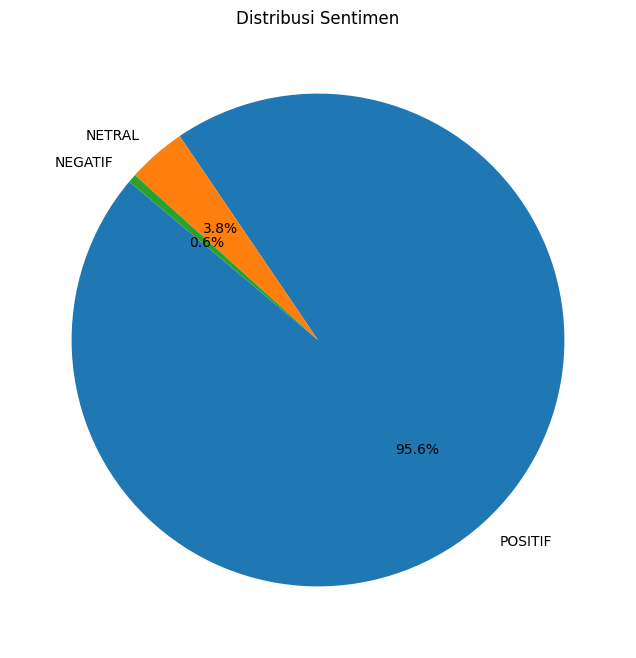

In [ ]:
# Menghitung persentase
total_counts = sentiment_counts.sum()
percentages = (sentiment_counts / total_counts) * 100

# Membuat pie chart dengan data sebenarnya
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Sentimen")
plt.show()

**WordCloud**

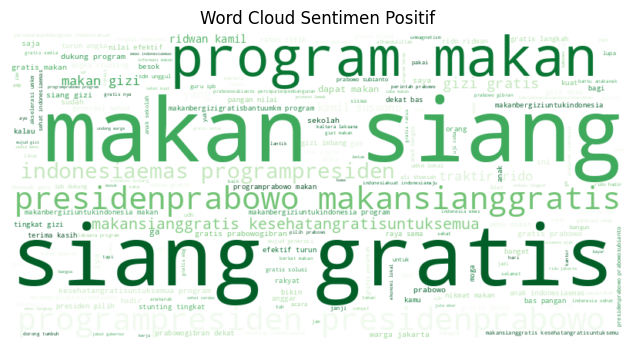

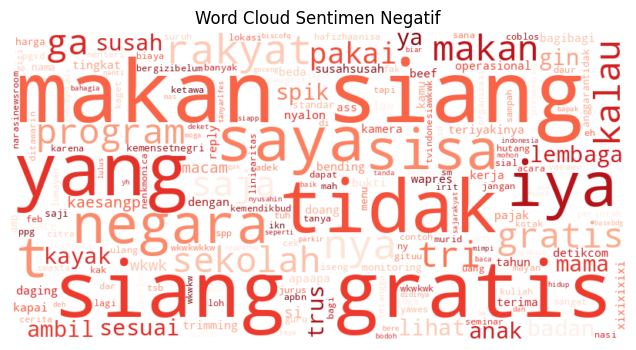

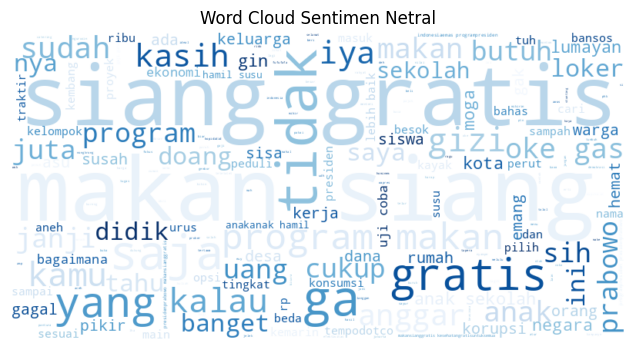

In [ ]:
# Fungsi untuk membuat dan menampilkan WordCloud dengan warna tertentu
def create_wordcloud(text, title, color='black'):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Memisahkan teks berdasarkan label sentimen
positif_text = ' '.join(data_label[data_label['label'] == 'POSITIF']['stemming'])
negatif_text = ' '.join(data_label[data_label['label'] == 'NEGATIF']['stemming'])
netral_text = ' '.join(data_label[data_label['label'] == 'NETRAL']['stemming'])

# Membuat WordCloud untuk tiap kategori sentimen dengan warna berbeda
create_wordcloud(positif_text, "Word Cloud Sentimen Positif", color='Greens')
create_wordcloud(negatif_text, "Word Cloud Sentimen Negatif", color='Reds')
create_wordcloud(netral_text, "Word Cloud Sentimen Netral", color='Blues')

**PEMODELAN SVM TANPA SMOTE**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Data_Label_Final 2.csv')
data

,stemming,label
0,makan siang gratis gratis beef teriyakinya pak...,NEGATIF
1,dut makan siang gratis dut laper,POSITIF
2,kemensetnegri paham universitas hidup makan si...,POSITIF
3,detikcom t t kapai operasional tri lembaga neg...,NEGATIF
4,unmagnetism makan siang gratis un,POSITIF
...,...,...
2336,gizi imbang anak bangsa indonesiaemas programp...,POSITIF
2337,makan gizi indonesiaemas programpresiden presi...,POSITIF
2338,roseuro program makan siang gizi gratis komitm...,POSITIF
2339,ariekriting nyindir program makan siang gratis...,POSITIF


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


Proses TF-IDF

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['stemming'])
vectorizer

TfidfVectorizer()

Encode label

In [ ]:
le = LabelEncoder()
y = le.fit_transform(data['label'])
label_names = le.classes_
le

LabelEncoder()

Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

Pemodelan dengan SVM Tanpa SMOTE

In [ ]:
svm_no_smote = SVC(kernel='linear')
svm_no_smote.fit(X_train, y_train)
y_pred_no_smote = svm_no_smote.predict(X_test)
cm_no_smote = confusion_matrix(y_test, y_pred_no_smote)
svm_no_smote

SVC(kernel='linear')

Jumlah data setelah SVM Tanpa SMOTE

In [ ]:
counts = pd.Series(y_train).value_counts().sort_index()

# Ubah label angka menjadi label asli (menggunakan LabelEncoder)
label_names = le.classes_  # ['NEGATIF', 'NETRAL', 'POSITIF']
counts.index = label_names

# Tampilkan hasil dengan label asli
counts


,count
NEGATIF,10
NETRAL,72
POSITIF,1790


Confusion Matrix

In [ ]:
from tabulate import tabulate

# Fungsi menghitung TP, FN, FP, TN tetap sama
def compute_metrics(cm, labels):
    results = []
    for i, label in enumerate(labels):
        TP = cm[i, i]
        FN = cm[i, :].sum() - TP
        FP = cm[:, i].sum() - TP
        TN = cm.sum() - (TP + FN + FP)
        results.append([label, TP, FN, FP, TN])
    return results

# Buat dan tampilkan tabelnya
metrics_no_smote = compute_metrics(cm_no_smote, label_names)
headers = ['Label', 'True Positive', 'False Negative', 'False Positive', 'True Negative']

print("=== [SVM TANPA SMOTE] TABEL TP, FN, FP, TN ===")
print(tabulate(metrics_no_smote, headers=headers, tablefmt='grid'))


=== [SVM TANPA SMOTE] TABEL TP, FN, FP, TN ===
+---------+-----------------+------------------+------------------+-----------------+
| Label   |   True Positive |   False Negative |   False Positive |   True Negative |
+=========+=================+==================+==================+=================+
| NEGATIF |               0 |                3 |                0 |             466 |
+---------+-----------------+------------------+------------------+-----------------+
| NETRAL  |               3 |               15 |                4 |             447 |
+---------+-----------------+------------------+------------------+-----------------+
| POSITIF |             446 |                2 |               16 |               5 |
+---------+-----------------+------------------+------------------+-----------------+


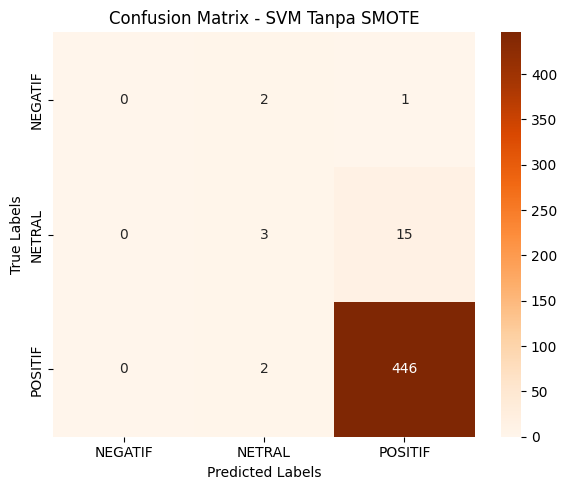

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# === VISUALISASI CONFUSION MATRIX ===
plt.figure(figsize=(6, 5))
sns.heatmap(cm_no_smote, annot=True, fmt='d', cmap='Oranges', xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix - SVM Tanpa SMOTE")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

Evaluasi Model

In [ ]:
# === CETAK CLASSIFICATION REPORT SECARA PERSENTASE ===
print("\n=== Classification Report (Tanpa SMOTE) [Dalam Persentase] ===")
report_dict = classification_report(
    y_test, y_pred_no_smote, target_names=label_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Konversi precision, recall, f1-score ke persen dan bulatkan
persen_report = report_df[['precision', 'recall', 'f1-score']] * 100
print(persen_report.round(2))


=== Classification Report (Tanpa SMOTE) [Dalam Persentase] ===
              precision  recall  f1-score
NEGATIF            0.00    0.00      0.00
NETRAL            42.86   16.67     24.00
POSITIF           96.54   99.55     98.02
accuracy          95.74   95.74     95.74
macro avg         46.46   38.74     40.67
weighted avg      93.86   95.74     94.55


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


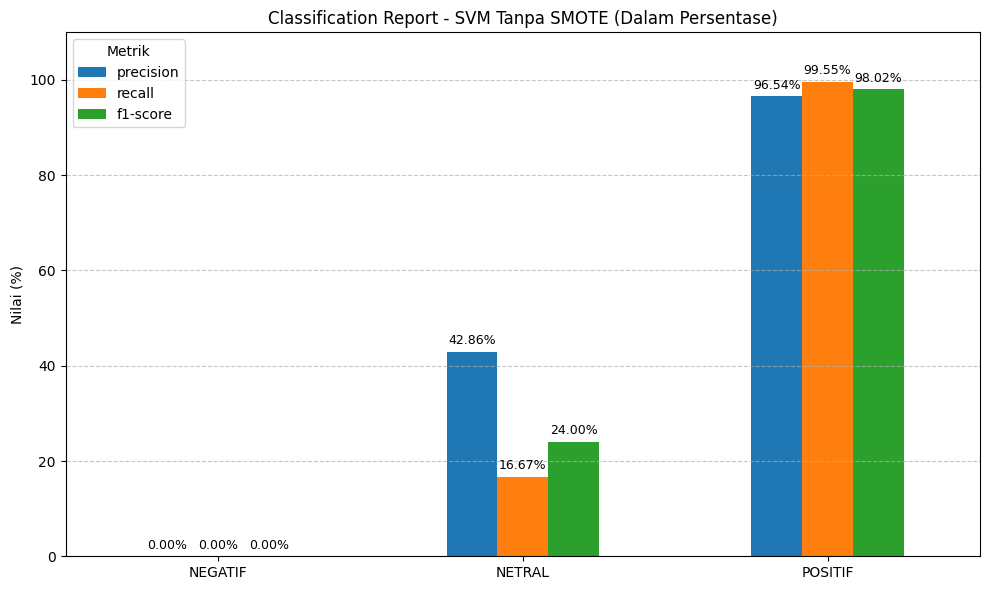

In [ ]:
import matplotlib.pyplot as plt

# Ambil hanya label kelas utama (bukan avg)
plot_data = persen_report.loc[label_names]  # NEGATIF, NETRAL, POSITIF

# Plot bar chart
ax = plot_data.plot(kind='bar', figsize=(10, 6), rot=0)

# Tambahkan angka di atas tiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1,
        s=f"{height:.2f}%",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Labeling dan layout
plt.title("Classification Report - SVM Tanpa SMOTE (Dalam Persentase)")
plt.ylabel("Nilai (%)")
plt.ylim(0, 110)
plt.legend(title="Metrik")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred_no_smote) * 100

# Classification report sebagai dictionary
report_dict = classification_report(
    y_test, y_pred_no_smote, target_names=label_names, output_dict=True)

# Ambil nilai macro average dan ubah ke persen
precision = report_dict['macro avg']['precision'] * 100
recall = report_dict['macro avg']['recall'] * 100
f1 = report_dict['macro avg']['f1-score'] * 100

# Tampilkan hasil dalam bentuk persentase
print("\n=== METRIK UTAMA SVM Tanpa SMOTE (dalam Persen) ===")
print(f"Akurasi    : {accuracy:.2f}%")
print(f"Precision  : {precision:.2f}%")
print(f"Recall     : {recall:.2f}%")
print(f"F1-score   : {f1:.2f}%")



=== METRIK UTAMA SVM Tanpa SMOTE (dalam Persen) ===
Akurasi    : 95.74%
Precision  : 46.46%
Recall     : 38.74%
F1-score   : 40.67%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


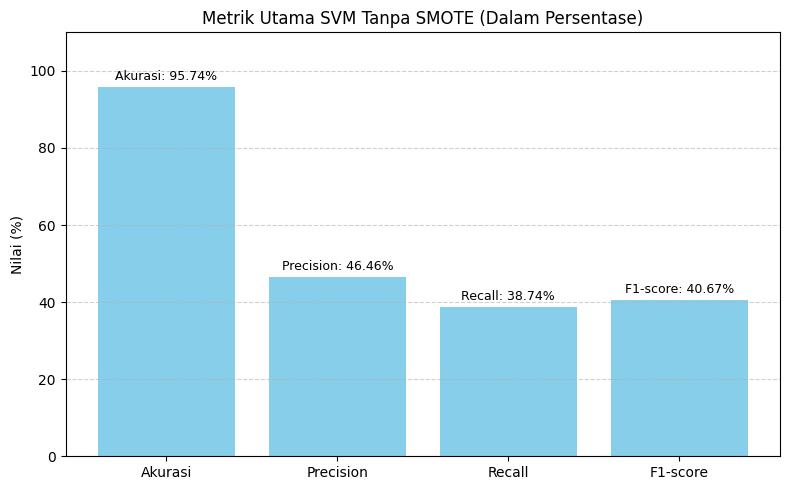

In [ ]:
import matplotlib.pyplot as plt

# Siapkan data visualisasi
metrik_labels = ['Akurasi', 'Precision', 'Recall', 'F1-score']
metrik_values = [accuracy, precision, recall, f1]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(metrik_labels, metrik_values, color='skyblue')

# Tambahkan nilai dan label metrik di atas bar
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 1,
             f"{metrik_labels[i]}: {yval:.2f}%",
             ha='center', va='bottom', fontsize=9)

# Labeling sumbu dan tampilan
plt.title("Metrik Utama SVM Tanpa SMOTE (Dalam Persentase)")
plt.ylabel("Nilai (%)")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**PEMODELAN SVM DENGAN SMOTE**

TF-IDF dan SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
smote

SMOTE(random_state=42)

In [ ]:
svm_smote_clf = SVC(kernel='linear', random_state=42)
svm_smote_clf.fit(X_train_smote, y_train_smote)
y_pred_smote = svm_smote_clf.predict(X_test)
cm_smote = confusion_matrix(y_test, y_pred_smote)

In [ ]:
# Hitung distribusi label
counts = pd.Series(y_train_smote).value_counts().sort_index()

# Ganti index angka dengan nama label asli
counts.index = le.inverse_transform(counts.index)

# Tampilkan hasilnya
counts


,count
NEGATIF,1790
NETRAL,1790
POSITIF,1790


Confusion Matrix

In [ ]:
from tabulate import tabulate  # pastikan sudah di-install

# Hitung metrik
metrics_df_smote = compute_metrics(cm_smote, label_names)
keys = ['Label', 'True Positive', 'False Negative', 'False Positive', 'True Negative']
# Tampilkan tabel dengan header deskriptif
print("\n=== [SVM DENGAN SMOTE] TABEL TP, FN, FP, TN ===")
print(tabulate(metrics_df_smote, headers='keys', tablefmt='grid'))



=== [SVM DENGAN SMOTE] TABEL TP, FN, FP, TN ===
+---------+-----+-----+-----+-----+
| 0       |   1 |   2 |   3 |   4 |
+=========+=====+=====+=====+=====+
| NEGATIF |   0 |   3 |   0 | 466 |
+---------+-----+-----+-----+-----+
| NETRAL  |   7 |  11 |   4 | 447 |
+---------+-----+-----+-----+-----+
| POSITIF | 446 |   2 |  12 |   9 |
+---------+-----+-----+-----+-----+


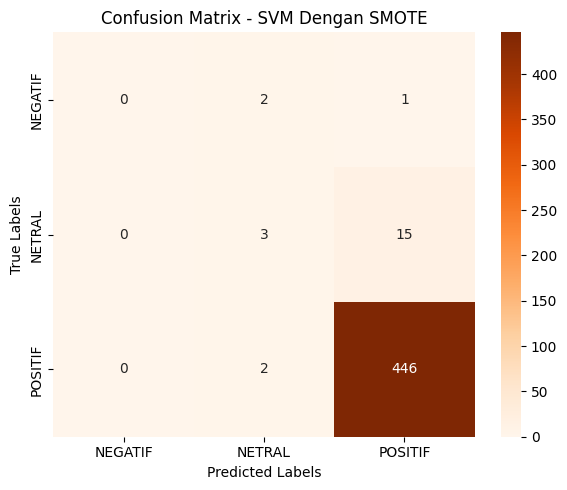

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# === VISUALISASI CONFUSION MATRIX ===
plt.figure(figsize=(6, 5))
sns.heatmap(cm_no_smote, annot=True, fmt='d', cmap='Oranges', xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix - SVM Dengan SMOTE")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

Evaluasi Model

In [ ]:
# === CLASSIFICATION REPORT (dalam persentase) ===
print("\n--- Classification Report (Dengan SMOTE) [Dalam Persentase] ---")
report_dict = classification_report(
    y_test, y_pred_smote, target_names=label_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_percent = report_df[['precision', 'recall', 'f1-score']] * 100
print(report_percent.round(2))


--- Classification Report (Dengan SMOTE) [Dalam Persentase] ---
              precision  recall  f1-score
NEGATIF            0.00    0.00      0.00
NETRAL            63.64   38.89     48.28
POSITIF           97.38   99.55     98.45
accuracy          96.59   96.59     96.59
macro avg         53.67   46.15     48.91
weighted avg      95.46   96.59     95.90


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


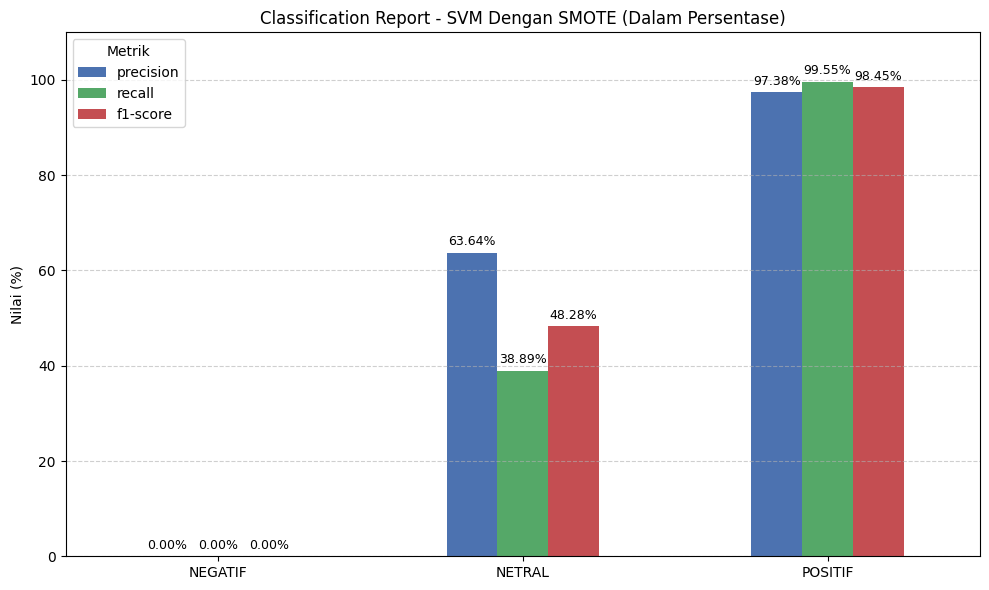

In [ ]:
import matplotlib.pyplot as plt

# Ambil hanya label kelas utama (tanpa avg)
plot_data_smote = report_percent.loc[label_names]  # ['NEGATIF', 'NETRAL', 'POSITIF']

# Buat bar chart
ax = plot_data_smote.plot(kind='bar', figsize=(10, 6), rot=0, color=['#4c72b0', '#55a868', '#c44e52'])

# Tambahkan angka di atas bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{height:.2f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Format dan tampilan
plt.title("Classification Report - SVM Dengan SMOTE (Dalam Persentase)")
plt.ylabel("Nilai (%)")
plt.ylim(0, 110)
plt.legend(title="Metrik")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Hitung akurasi (SMOTE)
accuracy_smote = accuracy_score(y_test, y_pred_smote) * 100

# Classification report (SMOTE) sebagai dictionary
report_dict_smote = classification_report(
    y_test, y_pred_smote, target_names=label_names, output_dict=True)

# Ambil nilai macro average dan ubah ke persen
precision_smote = report_dict_smote['macro avg']['precision'] * 100
recall_smote = report_dict_smote['macro avg']['recall'] * 100
f1_smote = report_dict_smote['macro avg']['f1-score'] * 100

# Tampilkan hasil
print("\n=== METRIK UTAMA SVM Dengan SMOTE (dalam Persen) ===")
print(f"Akurasi    : {accuracy_smote:.2f}%")
print(f"Precision  : {precision_smote:.2f}%")
print(f"Recall     : {recall_smote:.2f}%")
print(f"F1-score   : {f1_smote:.2f}%")



=== METRIK UTAMA SVM Dengan SMOTE (dalam Persen) ===
Akurasi    : 96.59%
Precision  : 53.67%
Recall     : 46.15%
F1-score   : 48.91%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


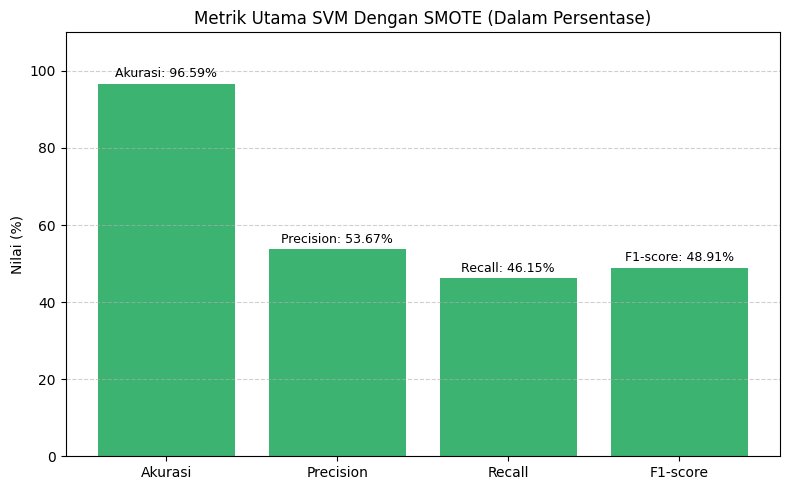

In [ ]:
import matplotlib.pyplot as plt

# Siapkan data visualisasi
metrik_labels_smote = ['Akurasi', 'Precision', 'Recall', 'F1-score']
metrik_values_smote = [accuracy_smote, precision_smote, recall_smote, f1_smote]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(metrik_labels_smote, metrik_values_smote, color='mediumseagreen')

# Tambahkan nilai (%) di atas bar
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        yval + 1,
        f"{metrik_labels_smote[i]}: {yval:.2f}%",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Label dan tampilan
plt.title("Metrik Utama SVM Dengan SMOTE (Dalam Persentase)")
plt.ylabel("Nilai (%)")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Kenaikan Akurasi setelah menggunakan SMOTE

In [ ]:
# Calculate and print accuracy improvement
accuracy_improvement = accuracy_smote - accuracy
print(f'\nPeningkatan Akurasi Setelah SMOTE: {accuracy_improvement:.2f}%')


Peningkatan Akurasi Setelah SMOTE: 0.85%


Perbandingan Visualisasi Hasil Akurasi

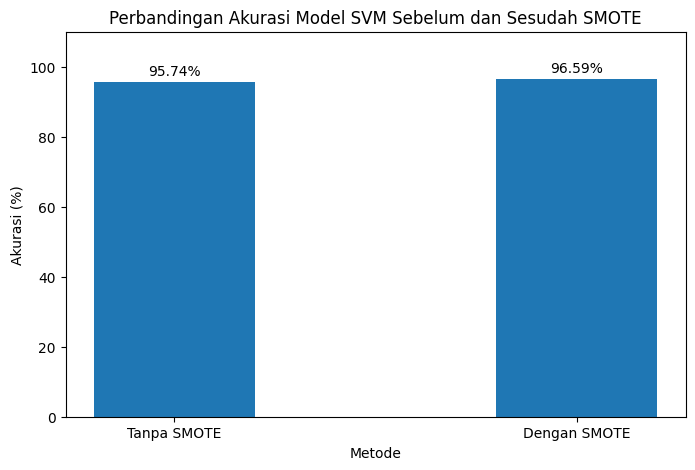

In [ ]:
import matplotlib.pyplot as plt

# Data akurasi
accuracy_values = [accuracy, accuracy_smote]  # Akurasi sudah dalam persen
labels = ["Tanpa SMOTE", "Dengan SMOTE"]

# Buat bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, accuracy_values, width=0.4)

# Tambahkan nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

# Tambahkan info sumbu
plt.xlabel("Metode")
plt.ylabel("Akurasi (%)")
plt.title("Perbandingan Akurasi Model SVM Sebelum dan Sesudah SMOTE")
plt.ylim(0, 110)  # Tambahkan sedikit ruang agar label tidak terpotong
plt.show()
